## __For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.__

## __Use the data to complete the following tasks:__

__Q.1)__ Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

__Q.2)__ Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

__Q.3)__ Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

__Q.4)__ Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

__Q.5)__ Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. 

*Please look through the boilerplate for hints

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from pandas.plotting import register_matplotlib_converters
#register_matplotlib_converters()
file="C:\\Users\\rothi\\Downloads\\fcc-forum-pageviews.csv"
df=pd.read_csv(file)
df.dtypes

date     object
value     int64
dtype: object

In [107]:
#check for duplicate rows
duplicates=df[df.duplicated(keep=False)]
duplicates

,date,value


In [108]:
#check for empty cells
empty=df[df.apply(lambda x:x=='', axis=1).any(axis=1)]
empty

,date,value


#### __Q.1) Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.__

In [109]:
q1_df=pd.read_csv(file, parse_dates=['date'], index_col='date')
q1_df.head(5)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


#### __Q.2) Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.__

In [57]:
q2_df=q1_df[(q1_df['value'] >= q1_df['value'].quantile(0.025)) & (q1_df['value'] <= q1_df['value'].quantile(0.975))]
q2_df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


#### __Q.3) Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.__

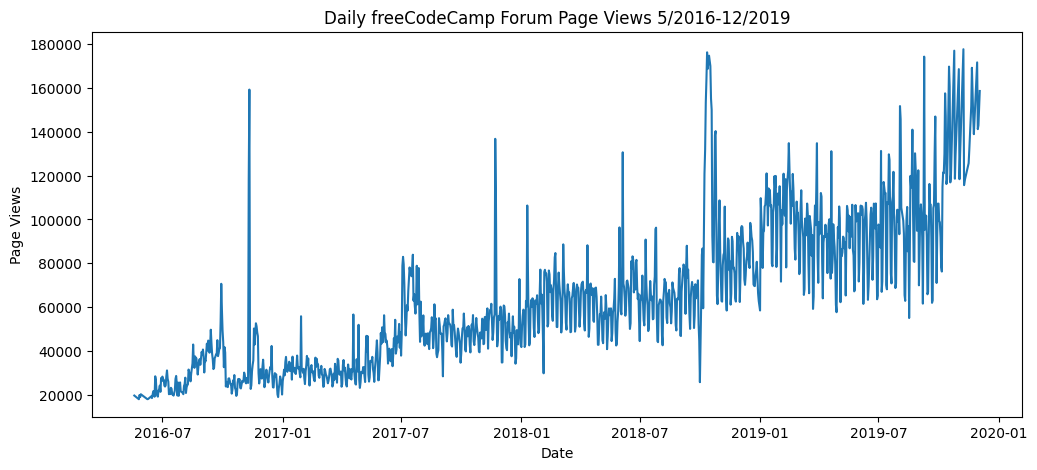

In [59]:
plt.figure(figsize=(12, 5))
plt.title ("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.plot(q2_df.index, q2_df['value'])

#### __Q.4)Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.__

In [86]:
average_views_permonth=q2_df.resample('ME').mean().round(2)
average_views_permonth.head(5)

,value,month,year
date,,,
2016-05-31,19432.40,5.0,2016.0
2016-06-30,21875.11,6.0,2016.0
2016-07-31,24109.68,7.0,2016.0
2016-08-31,31049.19,8.0,2016.0
2016-09-30,41476.87,9.0,2016.0


In [84]:
average_views_permonth['month']=average_views_permonth.index.month
average_views_permonth['year']=average_views_permonth.index.year
average_views_permonth_barplot=average_views_permonth.pivot(index='year', columns='month', values='value')
average_views_permonth_barplot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.40,21875.11,24109.68,31049.19,41476.87,27398.32,40448.63,27832.42
2017,32785.16,31113.07,29369.10,30878.73,34244.29,43577.50,65806.84,47712.45,47376.80,47438.71,57701.57,48420.58
2018,58580.10,65679.00,62693.77,62350.83,56562.87,70117.00,63591.06,62831.61,65941.73,111378.14,78688.33,80047.48
2019,102056.52,105968.36,91214.48,89368.43,91439.90,90435.64,97236.57,102717.31,97268.83,122802.27,143166.43,150733.50


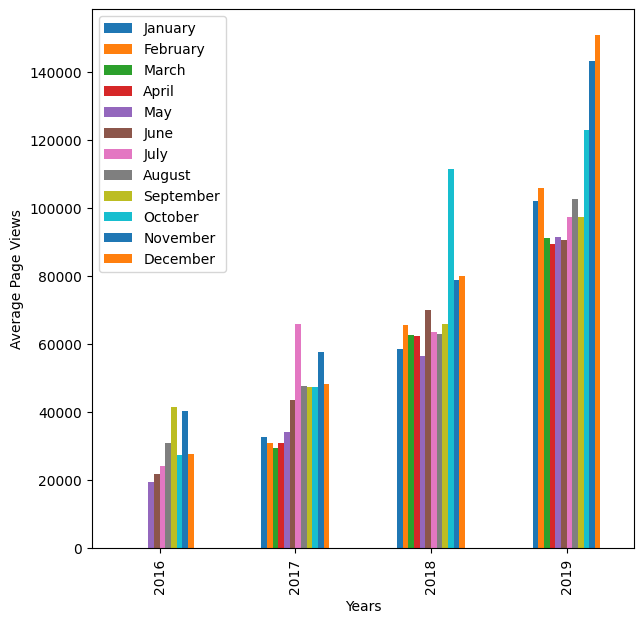

In [85]:
average_views_permonth_barplot.plot.bar(legend= True, figsize= (7,7), ylabel= 'Average Page Views', xlabel= 'Years')
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

#### __Q.5) Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.__

In [127]:
for_boxplot = q2_df.copy()
for_boxplot.reset_index(inplace=True)
for_boxplot['year'] = [d.year for d in for_boxplot.date]
for_boxplot['month'] = [d.strftime('%b') for d in for_boxplot.date]
for_boxplot

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1233,2019-11-24,138875,Nov,2019
1234,2019-11-29,171584,Nov,2019
1235,2019-11-30,141161,Nov,2019
1236,2019-12-01,142918,Dec,2019


In [128]:
for_boxplot['month_num']=for_boxplot['date'].dt.month
for_boxplot=for_boxplot.sort_values('month_num')
for_boxplot

,date,value,month,year,month_num
210,2017-01-06,37353,Jan,2017,1
937,2019-01-06,94108,Jan,2019,1
936,2019-01-05,77897,Jan,2019,1
935,2019-01-04,94514,Jan,2019,1
934,2019-01-03,100710,Jan,2019,1
...,...,...,...,...,...
567,2017-12-29,72819,Dec,2017,12
566,2017-12-28,51018,Dec,2017,12
565,2017-12-27,43075,Dec,2017,12
201,2016-12-28,28424,Dec,2016,12


Text(0, 0.5, 'Page Views')

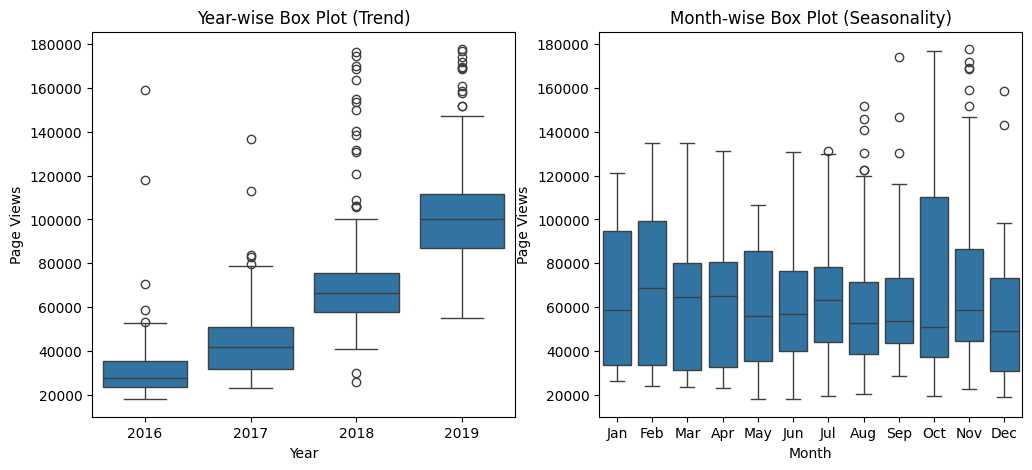

In [131]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0]=sns.boxplot(x=for_boxplot['year'], y=for_boxplot['value'], ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
axes[1]=sns.boxplot(x=for_boxplot['month'], y=for_boxplot['value'], ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")